In [12]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv("data/covid_data_train.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop_duplicates()
df = df.drop_duplicates(subset='name', keep="last")

df = df[df.inf_rate.isnull() == False]

In [37]:
df

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,0.000903,8.343086e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0,0.0
2,53.682800,53.655701,Абдулино,20663.0,Приволжский,Оренбургская область,15.95,27.7,542.0,0.05,...,NaN,5.164813e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0,0.0
3,44.864953,38.157819,Абинск,34926.0,Южный,Краснодарский край,73.73,17.6,1000.0,0.07,...,NaN,1.187676e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0,0.0
4,56.525460,52.997251,Агрыз,19299.0,Приволжский,Татарстан,57.27,28.2,1100.0,0.00,...,NaN,4.750316e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,Макарьев,7114.0,Центральный,Костромская область,10.70,19.1,121.0,0.00,...,NaN,1.276106e-13,NaN,NaN,0.0,NaN,99956.0,68367.0,31589.0,0.0
447,55.208321,67.252739,Макушино,8337.0,Уральский,Курганская область,11.91,NaN,NaN,NaN,...,NaN,NaN,0.000050,NaN,NaN,0.0,138138.0,81631.0,56507.0,0.0
448,58.844215,32.218636,Малая Вишера,12461.0,Северо-Западный,Новгородская область,10.97,NaN,NaN,NaN,...,NaN,NaN,0.000679,NaN,NaN,0.0,103185.0,66160.0,37025.0,0.0
449,52.399578,36.504021,Малоархангельск,3872.0,Центральный,Орловская область,30.25,21.8,160.0,0.00,...,NaN,3.079256e-14,0.000019,NaN,0.0,0.0,124919.0,80657.0,44262.0,0.0


### Exploring data

In [233]:
df

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,NaN,2.278095e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,0.000903,8.343086e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0,0.0
2,53.682800,53.655701,Абдулино,20663.0,Приволжский,Оренбургская область,15.95,27.7,542.0,0.05,...,NaN,5.164813e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0,0.0
3,44.864953,38.157819,Абинск,34926.0,Южный,Краснодарский край,73.73,17.6,1000.0,0.07,...,NaN,1.187676e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0,0.0
4,56.525460,52.997251,Агрыз,19299.0,Приволжский,Татарстан,57.27,28.2,1100.0,0.00,...,NaN,4.750316e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,Макарьев,7114.0,Центральный,Костромская область,10.70,19.1,121.0,0.00,...,NaN,1.276106e-13,NaN,NaN,0.0,NaN,99956.0,68367.0,31589.0,0.0
447,55.208321,67.252739,Макушино,8337.0,Уральский,Курганская область,11.91,NaN,NaN,NaN,...,NaN,NaN,0.000050,NaN,NaN,0.0,138138.0,81631.0,56507.0,0.0
448,58.844215,32.218636,Малая Вишера,12461.0,Северо-Западный,Новгородская область,10.97,NaN,NaN,NaN,...,NaN,NaN,0.000679,NaN,NaN,0.0,103185.0,66160.0,37025.0,0.0
449,52.399578,36.504021,Малоархангельск,3872.0,Центральный,Орловская область,30.25,21.8,160.0,0.00,...,NaN,3.079256e-14,0.000019,NaN,0.0,0.0,124919.0,80657.0,44262.0,0.0


In [ ]:
for district in df.district.unique:)

In [155]:
df[[i for i in df.columns if i.startswith('rural')] + ['population']]

,rural_50-54_years,rural_55-59_years,rural_60-64_years,rural_65-69_years,rural_70-74_years,rural_75-79_years,rural_80-84_years,rural_85-89_years,rural_90-94_years,rural,population
0,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,19320.0,17111.0
1,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,19320.0,165183.0
2,54073.99,67288.00,61433.99,44975.00,27214.99,17180.99,21453.99,6733.00,3378.99,113320.0,20663.0
3,154571.00,186884.00,178566.99,154503.00,99462.00,65497.99,76176.99,21533.99,12139.99,394849.0,34926.0
4,68434.99,76880.99,67086.99,49885.99,31964.99,25153.00,31070.99,15329.99,6277.00,155497.0,19299.0
...,...,...,...,...,...,...,...,...,...,...,...
446,12678.00,16623.00,17478.99,13025.00,7488.99,4259.00,5175.00,2522.99,888.00,31589.0,7114.0
447,20799.99,27817.99,28985.00,23308.00,13398.99,7778.00,10236.00,3903.00,1878.00,56507.0,8337.0
448,10954.00,14623.00,15408.00,12659.99,8698.00,5282.00,7005.00,3538.00,1424.00,37025.0,12461.0
449,17514.00,21398.99,21080.99,15317.99,10093.99,6368.00,8276.00,3613.00,1430.00,44262.0,3872.0


In [175]:
df[["inf_rate"]].describe()

,inf_rate
count,426.000000
mean,2.039893
std,0.930176
min,0.693147
25%,1.386294
50%,1.945910
75%,2.708050
max,4.718499


In [174]:
df[df.rural > df.population][['inf_rate']].describe()

,inf_rate
count,348.000000
mean,2.103515
std,0.950387
min,0.693147
25%,1.386294
50%,2.079442
75%,2.708050
max,4.718499


In [179]:
df[df.has_metro == 1][['inf_rate']]

,inf_rate
219,3.218876


In [173]:
df[df.rural < df.population][['inf_rate']].describe()

,inf_rate
count,78.000000
mean,1.756044
std,0.777990
min,0.693147
25%,1.098612
50%,1.609438
75%,2.246799
max,4.718499


In [319]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head(60)

epirank_avia                   89.36
epirank_avia_cat               89.36
ecology                        75.17
life_costs                     75.17
security                       75.17
public_transport               75.17
shops_and_malls                75.17
sport_and_outdoor              75.17
children_places                75.17
neighbourhood                  75.17
public_services                75.17
cleanness                      75.17
life_quality_place_rating      75.17
ekmo_number                    56.76
epirank_train_cat              38.80
epirank_train                  38.80
epirank_bus_cat                26.39
epirank_bus                    26.39
ekmo_per_100k                  21.95
ivl_number                     21.95
ivl_per_100k                   21.95
num_patients_tubercul_1995     11.31
num_patients_tubercul_1992     11.31
num_patients_tubercul_2002     11.31
num_patients_tubercul_2001     11.31
num_patients_tubercul_1994     11.31
num_patients_tubercul_2000     11.31
n

In [304]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [305]:
drop_constant_column(df[df.name == "Вельск"])

,life_quality_place_rating,ecology,cleanness,public_services,neighbourhood,children_places,sport_and_outdoor,shops_and_malls,public_transport,security,...,volume_serv_sport_2017,volume_serv_hotels_2017,volume_serv_tourism_2017,volume_serv_sanatorium_2017,num_phones_rural_2018,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_avia,epirank_avia_cat
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472206.8,1339836.8,1879836.3,1193270.59,178092.99,33344.99,66893.8,68055.6,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,472206.8,1339836.8,1879836.3,1193270.59,178092.99,33344.99,66387.7,67546.5,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446716.3,1276317.8,1790150.1,1183219.50,170261.99,31320.00,66893.8,68055.6,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,446716.3,1276317.8,1790150.1,1183219.50,170261.99,31320.00,66387.7,67546.5,NaN,NaN


In [181]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
correlated_features = to_drop

C:\Users\adnvl\AppData\Local\Temp\ipykernel_20576\1692054671.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [182]:
df2 = df.drop(correlated_features, axis=1)

In [184]:
df = df2

In [17]:
for i in df.columns:
    print(i, end=" ")

lat lng name population district subject density ivl_per_100k ivl_number ekmo_per_100k ekmo_number life_quality_place_rating ecology cleanness public_services neighbourhood children_places sport_and_outdoor shops_and_malls public_transport security life_costs inf_rate avg_temp_min avg_temp_max avg_temp_std avg_temp_median humidity_min humidity_max humidity_std humidity_median pressure_min pressure_max pressure_std pressure_median wind_speed_ms_min wind_speed_ms_max wind_speed_ms_std wind_speed_ms_median region_x urban_50-54_years urban_55-59_years urban_60-64_years urban_65-69_years urban_70-74_years urban_75-79_years urban_80-84_years urban_85-89_years urban_90-94_years rural_50-54_years rural_55-59_years rural_60-64_years rural_65-69_years rural_70-74_years rural_75-79_years rural_80-84_years rural_85-89_years rural_90-94_years work_ratio_15-72_years work_ratio_55-64_years work_ratio_15-24_years work_ratio_15-64_years work_ratio_25-54_years num_patients_tubercul_1992 num_patients_tub

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 120 entries, lat to has_metro
dtypes: float64(116), object(4)
memory usage: 422.9+ KB


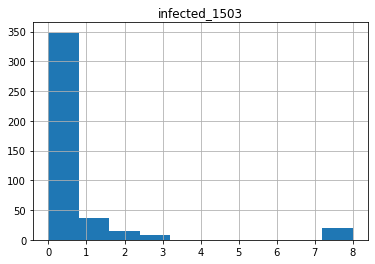

In [35]:
df.hist(column="infected_1503");

In [44]:
df.isna().any()[lambda x: x==False]


lat         False
lng         False
name        False
district    False
subject     False
dtype: bool

In [18]:
df.isnull().sum().sort_values(ascending = False)[lambda x: x!=0].head(30)

epirank_avia                  403
epirank_avia_cat              403
ecology                       339
life_costs                    339
security                      339
public_transport              339
shops_and_malls               339
sport_and_outdoor             339
children_places               339
neighbourhood                 339
public_services               339
cleanness                     339
life_quality_place_rating     339
ekmo_number                   256
epirank_train_cat             175
epirank_train                 175
epirank_bus_cat               119
epirank_bus                   119
ekmo_per_100k                  99
ivl_number                     99
ivl_per_100k                   99
num_patients_tubercul_1995     51
num_patients_tubercul_1992     51
num_patients_tubercul_2002     51
num_patients_tubercul_2001     51
num_patients_tubercul_1994     51
num_patients_tubercul_2000     51
num_patients_tubercul_1996     51
num_patients_tubercul_1997     51
num_patients_t

In [19]:
df.district.unique()

array(['Сибирский', 'Приволжский', 'Южный', 'Уральский',
       'Дальневосточный', 'Центральный', 'Северо-Западный',
       'Северо-Кавказский'], dtype=object)

In [299]:
df.name.value_counts()

451

In [21]:
df.subject.unique()

array(['Хакасия', 'Оренбургская область', 'Краснодарский край',
       'Татарстан', 'Ростовская область', 'Свердловская область',
       'Чувашия', 'Якутия', 'Алтайский край', 'Владимирская область',
       'Пермский край', 'Белгородская область', 'Тульская область',
       'Иркутская область', 'Крым', 'Чукотский АО', 'Тверская область',
       'Кемеровская область', 'Мурманская область', 'Чечня', 'Мордовия',
       'Нижегородская область', 'Саратовская область', 'Приморский край',
       'Красноярский край', 'Архангельская область', 'Томская область',
       'Астраханская область', 'Челябинская область',
       'Вологодская область', 'Бурятия', 'Кабардино-Балкария',
       'Калужская область', 'Московская область', 'Забайкальский край',
       'Новосибирская область', 'Ульяновская область',
       'Пензенская область', 'Амурская область', 'Карелия',
       'Башкортостан', 'Ханты-Мансийский АО — Югра',
       'Северная Осетия — Алания', 'Хабаровский край', 'Еврейская АО',
       'Ставр

In [22]:
df.region_x.unique()

array(['Республика Хакасия', 'Оренбургская область', 'Краснодарский край',
       'Республика Татарстан', 'Ростовская область',
       'Свердловская область', 'Республика Чувашия',
       'Республика Саха (Якутия)', 'Алтайский край',
       'Владимирская область', 'Пермский край', 'Белгородская область',
       'Тульская область', 'Иркутская область', 'Республика Крым', nan,
       'Тверская область', 'Кемеровская область', 'Мурманская область',
       'Чеченская Республика', 'Республика Мордовия',
       'Нижегородская область', 'Саратовская область', 'Приморский край',
       'Красноярский край', 'Архангельская область', 'Томская область',
       'Челябинская область', 'Вологодская область', 'Республика Бурятия',
       'Кабардино-Балкарская Республика', 'Калужская область',
       'Московская область', 'Забайкальский край',
       'Новосибирская область', 'Ульяновская область',
       'Пензенская область', 'Амурская область',
       'Республика Башкортостан',
       'Ханты-Мансийски

In [61]:
df.subject.corrwith("region_x")

AttributeError: 'Series' object has no attribute 'corrwith'

### Cleaning categorical data (filling Na)

In [5]:
missing_data_subject = set()
for i, elem in enumerate(df.region_x.isna()):
    if elem == True:
        print(i, elem, df['subject'].iloc[i])
        missing_data_subject.add(df['subject'].iloc[i])
        
print(missing_data_subject)

missing_regions = ['Республика Карелия', 'Республика Северная Осетия — Алания', 'Магаданская область', 'Республика Тыва', 'Еврейская автономная область', 'Ямало-Ненецкий автономный округ', 'Чукотский автономный округ', 'Астраханская область' ,'Республика Алтай', 'Курская область']

possibilities_dict = dict()
missing_data_subject = list(missing_data_subject)
for subject in missing_data_subject:
    for region in missing_regions:
        if subject.split()[0] in region:
            possibilities_dict[subject] = region 

    

20 True Чукотский АО
43 True Астраханская область
45 True Астраханская область
72 True Карелия
79 True Северная Осетия — Алания
82 True Еврейская АО
134 True Северная Осетия — Алания
169 True Алтай
181 True Ямало-Ненецкий АО
231 True Курская область
232 True Курская область
261 True Астраханская область
320 True Карелия
355 True Карелия
365 True Карелия
404 True Курская область
406 True Курская область
409 True Тыва
412 True Ямало-Ненецкий АО
416 True Карелия
437 True Курская область
441 True Магаданская область
{'Еврейская АО', 'Северная Осетия — Алания', 'Чукотский АО', 'Магаданская область', 'Ямало-Ненецкий АО', 'Курская область', 'Алтай', 'Астраханская область', 'Тыва', 'Карелия'}


In [14]:
categorical_df = df.select_dtypes(include=np.object)

C:\Users\adnvl\AppData\Local\Temp\ipykernel_18784\1265017787.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include=np.object)


In [7]:

for i, elem in enumerate(categorical_df['region_x']):
    if pd.isna(elem):
        subject_name = categorical_df['subject'].iloc[i]
        categorical_df['region_x'].iloc[i] = possibilities_dict[subject_name]

In [15]:
categorical_df = categorical_df.drop("subject", axis=1)


In [16]:
categorical_df.head(30)

,name,district,region_x
0,Абаза,Сибирский,Республика Хакасия
1,Абакан,Сибирский,Республика Хакасия
2,Абдулино,Приволжский,Оренбургская область
3,Абинск,Южный,Краснодарский край
4,Агрыз,Приволжский,Республика Татарстан
5,Азнакаево,Приволжский,Республика Татарстан
6,Азов,Южный,Ростовская область
7,Аксай,Южный,Ростовская область
8,Алапаевск,Уральский,Свердловская область
9,Алатырь,Приволжский,Республика Чувашия


In [236]:
categorical_df.isnull().values.any()

False

In [237]:
#test wihtout categorical
categorical_df.drop("name", axis=1, inplace=True)

### One hot encoding categorical data

In [17]:
cities = pd.get_dummies(categorical_df.name, prefix='city_') #test wihtout categorical
districts = pd.get_dummies(categorical_df.district, prefix='district_')
regions = pd.get_dummies(categorical_df.region_x, prefix='region_')
ohe_categorical_df = pd.concat([cities, districts, regions], axis=1) # without cities

In [54]:
ohe_categorical_df.corr()

,city__Абаза,city__Абакан,city__Абдулино,city__Абинск,city__Агрыз,city__Азнакаево,city__Азов,city__Аксай,city__Алапаевск,city__Алатырь,...,region__Томская область,region__Тульская область,region__Тюменская область,region__Удмуртская Республика,region__Ульяновская область,region__Хабаровский край,region__Ханты-Мансийский автономный округ — Югра,region__Челябинская область,region__Чеченская Республика,region__Ярославская область
city__Абаза,1.000000,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,...,-0.003146,-0.003858,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,-0.003858
city__Абакан,-0.002222,1.000000,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,...,-0.003146,-0.003858,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,-0.003858
city__Абдулино,-0.002222,-0.002222,1.000000,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,...,-0.003146,-0.003858,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,-0.003858
city__Абинск,-0.002222,-0.002222,-0.002222,1.000000,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,...,-0.003146,-0.003858,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,-0.003858
city__Агрыз,-0.002222,-0.002222,-0.002222,-0.002222,1.000000,-0.002222,-0.002222,-0.002222,-0.002222,-0.002222,...,-0.003146,-0.003858,-0.006335,-0.004459,-0.003858,-0.003858,-0.003858,-0.008121,-0.003858,-0.003858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
region__Хабаровский край,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,...,-0.005462,-0.006696,-0.010997,-0.007741,-0.006696,1.000000,-0.006696,-0.014098,-0.006696,-0.006696
region__Ханты-Мансийский автономный округ — Югра,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,...,-0.005462,-0.006696,-0.010997,-0.007741,-0.006696,-0.006696,1.000000,-0.014098,-0.006696,-0.006696
region__Челябинская область,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,-0.008121,...,-0.011498,-0.014098,-0.023151,-0.016297,-0.014098,-0.014098,-0.014098,1.000000,-0.014098,-0.014098
region__Чеченская Республика,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,-0.003858,...,-0.005462,-0.006696,-0.010997,-0.007741,-0.006696,-0.006696,-0.006696,-0.014098,1.000000,-0.006696


In [240]:
# correlating regions
cor_matrix = ohe_categorical_df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)


[]


C:\Users\adnvl\AppData\Local\Temp\ipykernel_20576\3159577055.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [18]:
ohe_categorical_df.isnull().values.any()

False

### Binary data

In [20]:
for column in df.select_dtypes(include=np.number).columns:
    if len(df[column].unique()) <= 3:
        print(column, df[column].unique())

has_metro [ 0. nan  1.]


<AxesSubplot:>

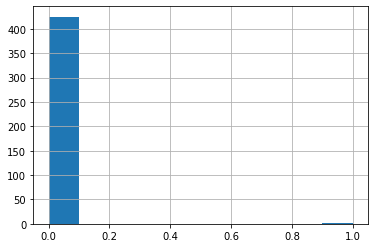

In [243]:
df['has_metro'].hist()

In [244]:
df.has_metro.isna().any()

True

In [245]:
# check manually if city has a metro

In [246]:
df[df['has_metro'].isna()].name

20           Анадырь
43         Астрахань
45         Ахтубинск
57             Балей
72         Беломорск
79            Беслан
82        Биробиджан
98             Борзя
134      Владикавказ
169    Горно-Алтайск
181       Губкинский
231     Железногорск
232     Железногорск
261         Знаменск
320             Кемь
355        Кондопога
365       Костомукша
378    Краснокаменск
404            Курск
406         Курчатов
409            Кызыл
412       Лабытнанги
416      Лахденпохья
437            Льгов
441          Магадан
Name: name, dtype: object

In [247]:
# none of them has a metro, so fill with 0

In [19]:
metro_column = df.has_metro

In [20]:
metro_column = metro_column.fillna(0)

In [21]:
metro_column.isna().any()

False

In [22]:
# binary is: has_metro and categorical
# numerical is: other data 

In [38]:
#merge all binary and numerical
#binary_df = pd.concat([ohe_categorical_df, metro_column], axis=1)
numerical_df = df.select_dtypes(include=np.number).drop('has_metro', axis=1)

In [6]:
df=numerical_df

### Cleaning numerical data (filling Na)

In [77]:
for i in numerical_df.columns[numerical_df.isnull().any(axis=0)]: 
    numerical_df[i].fillna(numerical_df[i].mean(),inplace=True)


In [39]:
# Delete columns containing either 25% or more than 25% NaN Values
perc = 50.0
min_count =  int(((100-perc)/100)*numerical_df.shape[0] + 1)
mod_df = numerical_df.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(mod_df)

Modified Dataframe : 
           lat        lng  population  density  ivl_per_100k  ivl_number  \
0    52.651055  90.101159     17111.0     8.68           NaN         NaN   
1    53.720902  91.442435    165183.0     8.68           NaN         NaN   
2    53.682800  53.655701     20663.0    15.95          27.7       542.0   
3    44.864953  38.157819     34926.0    73.73          17.6      1000.0   
4    56.525460  52.997251     19299.0    57.27          28.2      1100.0   
..         ...        ...         ...      ...           ...         ...   
446  57.880402  43.807240      7114.0    10.70          19.1       121.0   
447  55.208321  67.252739      8337.0    11.91           NaN         NaN   
448  58.844215  32.218636     12461.0    10.97           NaN         NaN   
449  52.399578  36.504021      3872.0    30.25          21.8       160.0   
450  55.012181  36.459025     30401.0    33.85           4.8        48.0   

     ekmo_per_100k  inf_rate  avg_temp_min  avg_temp_max  ...  \


In [78]:
mod_df

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,inf_rate,avg_temp_min,avg_temp_max,...,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_bus,epirank_train,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
0,52.651055,90.101159,17111.0,8.68,NaN,NaN,NaN,1.386294,-12.29,5.57,...,16199.99,21414.0,22186.0,2.278095e-11,NaN,0.0,NaN,64241.0,44921.0,19320.0
1,53.720902,91.442435,165183.0,8.68,NaN,NaN,NaN,1.386294,-12.29,5.57,...,16199.99,21414.0,22186.0,8.343086e-10,0.001383,1.0,0.0,64241.0,44921.0,19320.0
2,53.682800,53.655701,20663.0,15.95,27.7,542.0,0.05,2.079442,-6.71,5.71,...,106326.00,135226.1,133554.9,5.164813e-14,0.000376,0.0,0.0,270081.0,156761.0,113320.0
3,44.864953,38.157819,34926.0,73.73,17.6,1000.0,0.07,2.890372,5.14,16.86,...,315344.00,329792.1,328273.8,1.187676e-14,0.000186,0.0,0.0,847286.0,452437.0,394849.0
4,56.525460,52.997251,19299.0,57.27,28.2,1100.0,0.00,2.708050,-2.14,5.00,...,144303.99,157885.0,162064.9,4.750316e-13,0.001003,0.0,0.0,527462.0,371965.0,155497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,7114.0,10.70,19.1,121.0,0.00,0.693147,-3.43,4.71,...,30703.99,44207.8,47905.6,1.276106e-13,NaN,0.0,NaN,99956.0,68367.0,31589.0
447,55.208321,67.252739,8337.0,11.91,NaN,NaN,NaN,0.693147,-9.00,2.86,...,37022.99,36768.7,37999.8,NaN,0.000050,NaN,0.0,138138.0,81631.0,56507.0
448,58.844215,32.218636,12461.0,10.97,NaN,NaN,NaN,1.386294,-2.14,4.71,...,22181.00,29494.0,28061.6,NaN,0.000679,NaN,0.0,103185.0,66160.0,37025.0
449,52.399578,36.504021,3872.0,30.25,21.8,160.0,0.00,1.386294,-3.57,10.71,...,16747.00,36689.2,37310.6,3.079256e-14,0.000019,0.0,0.0,124919.0,80657.0,44262.0


In [79]:
numerical_df

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,ekmo_number,life_quality_place_rating,ecology,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
0,52.651055,90.101159,17111.0,8.68,21.08628,531.588476,0.193994,1.707865,129.15,118.97,...,22186.0,0.004216,2.278095e-11,0.000922,0.232558,0.000000,0.119522,64241.0,44921.0,19320.0
1,53.720902,91.442435,165183.0,8.68,21.08628,531.588476,0.193994,1.707865,26.00,93.00,...,22186.0,0.000903,8.343086e-10,0.001383,0.000000,1.000000,0.000000,64241.0,44921.0,19320.0
2,53.682800,53.655701,20663.0,15.95,27.70000,542.000000,0.050000,1.000000,129.15,118.97,...,133554.9,0.004216,5.164813e-14,0.000376,0.232558,0.000000,0.000000,270081.0,156761.0,113320.0
3,44.864953,38.157819,34926.0,73.73,17.60000,1000.000000,0.070000,4.000000,129.15,118.97,...,328273.8,0.004216,1.187676e-14,0.000186,0.232558,0.000000,0.000000,847286.0,452437.0,394849.0
4,56.525460,52.997251,19299.0,57.27,28.20000,1100.000000,0.000000,1.707865,129.15,118.97,...,162064.9,0.004216,4.750316e-13,0.001003,0.232558,0.000000,0.000000,527462.0,371965.0,155497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,7114.0,10.70,19.10000,121.000000,0.000000,1.707865,129.15,118.97,...,47905.6,0.004216,1.276106e-13,0.000922,0.232558,0.000000,0.119522,99956.0,68367.0,31589.0
447,55.208321,67.252739,8337.0,11.91,21.08628,531.588476,0.193994,1.707865,129.15,118.97,...,37999.8,0.004216,8.007188e-11,0.000050,0.232558,0.100977,0.000000,138138.0,81631.0,56507.0
448,58.844215,32.218636,12461.0,10.97,21.08628,531.588476,0.193994,1.707865,129.15,118.97,...,28061.6,0.004216,8.007188e-11,0.000679,0.232558,0.100977,0.000000,103185.0,66160.0,37025.0
449,52.399578,36.504021,3872.0,30.25,21.80000,160.000000,0.000000,1.707865,129.15,118.97,...,37310.6,0.004216,3.079256e-14,0.000019,0.232558,0.000000,0.000000,124919.0,80657.0,44262.0


In [86]:
for i in mod_df.columns[mod_df.isnull().any(axis=0)]: 
    mod_df[i].fillna(mod_df[i].mean(),inplace=True)

C:\Users\adnvl\AppData\Local\Temp\ipykernel_33896\964517639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df[i].fillna(mod_df[i].mean(),inplace=True)


In [41]:
numerical_df.isnull().values.any()

True

In [89]:
mod_df

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,avg_temp_min,avg_temp_max,avg_temp_std,...,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_bus,epirank_train,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
0,52.651055,90.101159,17111.0,8.68,21.08628,531.588476,0.193994,-12.29,5.57,4.433932,...,16199.99,21414.0,22186.0,2.278095e-11,0.000922,0.000000,0.119522,64241.0,44921.0,19320.0
1,53.720902,91.442435,165183.0,8.68,21.08628,531.588476,0.193994,-12.29,5.57,4.433932,...,16199.99,21414.0,22186.0,8.343086e-10,0.001383,1.000000,0.000000,64241.0,44921.0,19320.0
2,53.682800,53.655701,20663.0,15.95,27.70000,542.000000,0.050000,-6.71,5.71,3.917991,...,106326.00,135226.1,133554.9,5.164813e-14,0.000376,0.000000,0.000000,270081.0,156761.0,113320.0
3,44.864953,38.157819,34926.0,73.73,17.60000,1000.000000,0.070000,5.14,16.86,3.582800,...,315344.00,329792.1,328273.8,1.187676e-14,0.000186,0.000000,0.000000,847286.0,452437.0,394849.0
4,56.525460,52.997251,19299.0,57.27,28.20000,1100.000000,0.000000,-2.14,5.00,2.071856,...,144303.99,157885.0,162064.9,4.750316e-13,0.001003,0.000000,0.000000,527462.0,371965.0,155497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,57.880402,43.807240,7114.0,10.70,19.10000,121.000000,0.000000,-3.43,4.71,2.088225,...,30703.99,44207.8,47905.6,1.276106e-13,0.000922,0.000000,0.119522,99956.0,68367.0,31589.0
447,55.208321,67.252739,8337.0,11.91,21.08628,531.588476,0.193994,-9.00,2.86,3.363414,...,37022.99,36768.7,37999.8,8.007188e-11,0.000050,0.100977,0.000000,138138.0,81631.0,56507.0
448,58.844215,32.218636,12461.0,10.97,21.08628,531.588476,0.193994,-2.14,4.71,2.044057,...,22181.00,29494.0,28061.6,8.007188e-11,0.000679,0.100977,0.000000,103185.0,66160.0,37025.0
449,52.399578,36.504021,3872.0,30.25,21.80000,160.000000,0.000000,-3.57,10.71,3.529767,...,16747.00,36689.2,37310.6,3.079256e-14,0.000019,0.000000,0.000000,124919.0,80657.0,44262.0


### Scaling numerical data

In [27]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# getting target variable
y = mod_df.inf_rate
mod_df.drop("inf_rate", axis=1, inplace=True)

C:\Users\adnvl\AppData\Local\Temp\ipykernel_33896\1113230574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop("inf_rate", axis=1, inplace=True)


In [27]:
binary_df.shape, numerical_df.shape, y.shape

((426, 472), (426, 114), (426,))

In [28]:
binary_df.isnull().values.any(), numerical_df.isnull().values.any(), y.isnull().values.any()

(False, True, False)

In [37]:
for i,j in enumerate(y):
    if not isinstance(j, float):
        print(i)

In [43]:
df.inf_rate.head(50)

0     1.386294
1     1.386294
2     2.079442
3     2.890372
4     2.708050
5     2.708050
6     1.098612
7     1.098612
8     3.218876
9     0.693147
10    2.772589
11    0.693147
12    1.098612
13    2.564949
14    1.609438
15    2.564949
16    1.098612
17    2.772589
18    1.791759
19    2.708050
20         NaN
21    2.890372
22    1.098612
23    1.609438
24    0.693147
25    1.791759
26    3.218876
27    2.302585
28    1.386294
29    2.397895
30    1.609438
31    2.890372
32    1.098612
33    2.708050
34    1.098612
35    2.708050
36    3.218876
37    2.079442
38    2.079442
39    2.079442
40    2.079442
41    3.218876
42    1.386294
43         NaN
44    1.609438
45         NaN
46    2.708050
47    2.708050
48    1.098612
49    2.639057
Name: inf_rate, dtype: float64

In [40]:
for i,j in enumerate(y.isnull()):
    if j == True:
        print(i, )

20
43
45
57
72
79
82
98
134
169
181
231
232
261
320
355
365
378
404
406
409
412
416
437
441


#### Train test split

In [47]:
# from sklearn.model_selection import train_test_split
# binary_train, binary_test, numerical_train, numerical_test, y_train, y_test = train_test_split(binary_df, numerical_df, y, test_size=0.1, shuffle=True, random_state=2019)

NameError: name 'binary_df' is not defined

In [90]:
X = mod_df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=2019)

#### Scaling  numerical train

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)

In [63]:
X_scaled_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [92]:
X_scaled_train=pd.DataFrame(X_scaled_train, columns=X_train.columns, index=X_train.index)

In [93]:
X_scaled_train.head()

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,avg_temp_min,avg_temp_max,avg_temp_std,...,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_bus,epirank_train,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
420,0.081793,1.254854,0.209678,-0.211621,0.559858,0.471761,-0.352101,-1.940390,-0.765088,1.789883,...,-0.694388,0.629200,0.401588,0.291275,-0.386260,2.581184,-0.395753,-0.003176,0.252398,-0.626609
272,-0.084395,-0.347443,-0.355620,-0.069831,-0.001765,-0.017315,0.007865,0.592446,-0.161617,-1.006186,...,-0.675482,-0.390512,-0.400167,-0.175270,-0.299627,-0.274092,-0.395753,-0.696739,-0.676183,-0.549020
381,-1.144975,-0.419632,-0.372894,-0.143180,-1.907638,-1.354293,2.553045,0.716419,-0.034688,-1.119403,...,-0.406740,-0.878145,-0.868686,-0.175407,-0.003800,-0.274092,0.003486,-1.005371,-1.049642,-0.611610
10,0.893271,2.833537,-0.337053,-0.972652,-0.001765,-0.017315,0.007865,-3.694952,-3.755716,1.108536,...,-0.581586,-0.943891,-0.919797,0.017899,-0.416128,0.014226,-0.395753,-1.213012,-1.165092,-0.985473
163,1.091298,-1.000569,0.147788,-0.391586,-0.001765,-0.017315,0.007865,0.223971,-0.671561,-1.543715,...,-0.434176,-0.577698,-0.558269,0.017899,-0.330228,0.014226,-0.395753,-0.358258,-0.457096,-0.015033


In [94]:
X_scaled_test = scaler.transform(X_test)
X_scaled_test=pd.DataFrame(X_scaled_test, columns=X_test.columns, index=X_test.index)

### Concatenating train/test

In [58]:
X_train = pd.concat([binary_train, numerical_scaled_train], axis=1)
X_test = pd.concat([binary_test, numerical_scaled_test], axis=1)

In [59]:
# X_train = pd.concat([binary_train, numerical_train], axis=1)
# X_test = pd.concat([binary_test, numerical_test], axis=1)

In [60]:
X_train.head()

,city__Абаза,city__Абакан,city__Абдулино,city__Абинск,city__Агрыз,city__Азнакаево,city__Азов,city__Аксай,city__Алапаевск,city__Алатырь,...,bus_april_travel_18,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
44,0,0,0,0,0,0,0,0,0,0,...,0.841093,NaN,-0.150134,-0.300354,NaN,-0.23632,-0.309586,0.165083,0.222837,-0.025135
270,0,0,0,0,0,0,0,0,0,0,...,-0.157283,NaN,-0.149938,-0.320003,NaN,-0.23632,-0.309586,0.121953,-0.147003,0.762736
107,0,0,0,0,0,0,0,0,0,0,...,-0.157283,NaN,-0.149275,NaN,NaN,-0.23632,NaN,0.121953,-0.147003,0.762736
221,0,0,0,0,0,0,0,0,0,0,...,-0.747124,NaN,-0.143760,-0.185718,NaN,-0.23632,-0.309586,-0.716818,-0.793744,-0.326746
450,0,0,0,0,0,0,0,0,0,0,...,-0.944602,NaN,NaN,-0.145298,NaN,NaN,-0.309586,-0.815058,-0.740503,-0.777754


In [61]:
y_train.head()

44     1.609438
270    1.945910
107    1.945910
221    2.079442
450    1.386294
Name: inf_rate, dtype: float64

In [95]:
df..plot()

SyntaxError: invalid syntax (1066072161.py, line 1)

In [98]:
X_scaled_train

,lat,lng,population,density,ivl_per_100k,ivl_number,ekmo_per_100k,avg_temp_min,avg_temp_max,avg_temp_std,...,num_phones_urban_2019,bus_march_travel_18,bus_april_travel_18,epirank_bus,epirank_train,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural
420,0.081793,1.254854,0.209678,-0.211621,0.559858,0.471761,-0.352101,-1.940390,-0.765088,1.789883,...,-0.694388,0.629200,0.401588,0.291275,-0.386260,2.581184,-0.395753,-0.003176,0.252398,-0.626609
272,-0.084395,-0.347443,-0.355620,-0.069831,-0.001765,-0.017315,0.007865,0.592446,-0.161617,-1.006186,...,-0.675482,-0.390512,-0.400167,-0.175270,-0.299627,-0.274092,-0.395753,-0.696739,-0.676183,-0.549020
381,-1.144975,-0.419632,-0.372894,-0.143180,-1.907638,-1.354293,2.553045,0.716419,-0.034688,-1.119403,...,-0.406740,-0.878145,-0.868686,-0.175407,-0.003800,-0.274092,0.003486,-1.005371,-1.049642,-0.611610
10,0.893271,2.833537,-0.337053,-0.972652,-0.001765,-0.017315,0.007865,-3.694952,-3.755716,1.108536,...,-0.581586,-0.943891,-0.919797,0.017899,-0.416128,0.014226,-0.395753,-1.213012,-1.165092,-0.985473
163,1.091298,-1.000569,0.147788,-0.391586,-0.001765,-0.017315,0.007865,0.223971,-0.671561,-1.543715,...,-0.434176,-0.577698,-0.558269,0.017899,-0.330228,0.014226,-0.395753,-0.358258,-0.457096,-0.015033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.209639,-0.120100,-0.197488,0.580494,0.641205,1.412624,-0.604723,0.470195,-0.384300,-1.193584,...,1.061548,-0.089882,-0.082225,0.017899,-0.411624,0.014226,-0.395753,0.632145,0.539189,0.679641
330,0.722030,2.138345,-0.395712,-0.895758,0.487551,0.237803,-0.604723,-1.473770,-0.733912,1.709915,...,-0.760141,-0.256755,-0.279656,0.017899,-0.003800,0.014226,0.003486,-0.310703,-0.155811,-0.600818
179,0.941428,0.103264,-0.294431,-0.535830,-0.099948,-0.046468,-0.478412,-0.538807,-0.542405,-0.032901,...,0.035390,0.771543,0.832605,-0.170166,-0.410499,-0.274092,-0.395753,-0.061296,0.022486,-0.248552
424,0.814057,1.509227,-0.065901,-0.947566,0.315820,0.421448,-0.509990,-1.916285,-0.542405,2.563369,...,-0.161118,0.187862,0.168483,0.106180,-0.003800,2.581184,0.003486,-0.091323,-0.037498,-0.196869


### Trying linear regression

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as MAE

In [106]:
reg = linear_model.LinearRegression()
reg.fit(X_scaled_train, y_train)
y_pred_lr = reg.predict(X_scaled_test)
print(MAE(y_test, y_pred_lr))

5.7148730192579934e-15


In [108]:
reg = linear_model.LinearRegression()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(reg, X_scaled_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.046 (0.058)


In [104]:
np.array(y_test)

array([1.38629436, 1.09861229, 1.09861229, 2.7080502 , 1.38629436,
       2.7080502 , 1.38629436, 2.30258509, 3.21887582, 1.94591015,
       1.09861229, 1.38629436, 1.94591015, 1.38629436, 1.94591015,
       1.38629436, 1.09861229, 2.30258509, 2.30258509, 1.79175947,
       2.39789527, 1.09861229, 1.94591015, 1.38629436, 2.39789527,
       1.79175947, 0.69314718, 0.69314718, 1.09861229, 2.30258509,
       1.09861229, 3.13549422, 0.69314718, 0.69314718, 0.69314718,
       2.7080502 , 1.60943791, 1.09861229, 2.7080502 , 3.21887582])

In [102]:
y_pred_lr

array([1.38629436, 1.09861229, 1.09861229, 2.7080502 , 1.38629436,
       2.7080502 , 1.38629436, 2.30258509, 3.21887582, 1.94591015,
       1.09861229, 1.38629436, 1.94591015, 1.38629436, 1.94591015,
       1.38629436, 1.09861229, 2.30258509, 2.30258509, 1.79175947,
       2.39789527, 1.09861229, 1.94591015, 1.38629436, 2.39789527,
       1.79175947, 0.69314718, 0.69314718, 1.09861229, 2.30258509,
       1.09861229, 3.13549422, 0.69314718, 0.69314718, 0.69314718,
       2.7080502 , 1.60943791, 1.09861229, 2.7080502 , 3.21887582])

In [101]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(MAE(y_test, y_pred_clf))
#clf.score(X_test, y_test)

0.21363573178581396


D:\Anaconda\envs\Hakaton1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+01, tolerance: 3.215e-02
  model = cd_fast.enet_coordinate_descent(


In [274]:
reg.score(X_test, y_test)

0.9879526098404657

### Random Forest 

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
rf = RandomForestRegressor(max_depth=100, random_state=0, criterion="absolute_error", max_features="sqrt")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.048660023638144444


In [111]:
rf = RandomForestRegressor(max_depth=100, random_state=0, criterion="absolute_error")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.0528819941741135


In [112]:
rf = RandomForestRegressor(max_depth=200, random_state=2, criterion="absolute_error", oob_score=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(MAE(y_test, y_pred_rf))

0.051578487514828034


In [113]:
y_pred_rf

array([1.38212677, 1.10148911, 1.09861229, 2.7080502 , 1.52510991,
       2.7080502 , 1.38212677, 2.22684593, 3.21376757, 1.94591015,
       1.09861229, 1.47027993, 1.93204304, 1.54258664, 1.93204304,
       1.31463527, 1.10659737, 2.25176915, 1.82505231, 1.50198823,
       2.40099682, 1.10659737, 1.94591015, 1.38564898, 2.39471074,
       1.7955347 , 0.70531113, 0.69720183, 1.10659737, 1.79756359,
       1.09861229, 3.08903997, 0.70936578, 0.69720183, 0.69720183,
       2.7080502 , 1.65211887, 1.09861229, 2.7080502 , 3.21376757])

In [114]:
np.array(list(y_test))

array([1.38629436, 1.09861229, 1.09861229, 2.7080502 , 1.38629436,
       2.7080502 , 1.38629436, 2.30258509, 3.21887582, 1.94591015,
       1.09861229, 1.38629436, 1.94591015, 1.38629436, 1.94591015,
       1.38629436, 1.09861229, 2.30258509, 2.30258509, 1.79175947,
       2.39789527, 1.09861229, 1.94591015, 1.38629436, 2.39789527,
       1.79175947, 0.69314718, 0.69314718, 1.09861229, 2.30258509,
       1.09861229, 3.13549422, 0.69314718, 0.69314718, 0.69314718,
       2.7080502 , 1.60943791, 1.09861229, 2.7080502 , 3.21887582])

In [115]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


In [116]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()



In [117]:
s = sorted_idx

In [118]:
plt.barh(X_train.columns[s], perm_importance.importances_mean[s])
plt.xlabel("Permutation Importance")

NameError: name 'plt' is not defined

In [119]:
for i in zip(X_train.columns[s],perm_importance.importances_mean[s]) :
    print(i[0], round(i[1], 5))

urban_55-59_years -0.00058
work_ratio_15-72_years -0.00056
volume_serv_hotels_2017 -0.00012
volume_serv_education_2017 -7e-05
work_ratio_15-64_years -4e-05
urban_60-64_years -3e-05
population -2e-05
epirank_train -1e-05
epirank_bus 0.0
wind_speed_ms_median 1e-05
epirank_bus_cat 2e-05
epirank_train_cat 8e-05
num_patients_tubercul_2002 8e-05
num_patients_tubercul_1998 0.00011
urban_70-74_years 0.00013
whole_population 0.00015
wind_speed_ms_max 0.00015
num_patients_tubercul_1995 0.00018
volume_serv_post_2017 0.00018
urban_65-69_years 0.0002
rural_50-54_years 0.00023
wind_speed_ms_min 0.00027
urban 0.00027
volume_serv_medicine_2017 0.00041
volume_serv_culture_2017 0.00049
pressure_max 0.0005
num_patients_tubercul_1996 0.00055
volume_serv_veterinary_2017 0.00062
num_patients_tubercul_1993 0.00063
ekmo_per_100k 0.00065
bus_april_travel_18 0.00072
lat 0.00075
rural_75-79_years 0.00076
pressure_median 0.00078
humidity_std 0.00083
avg_temp_min 0.0009
humidity_median 0.00091
num_patients_tubercu

In [345]:
perm_importance.importances_mean[s]

array([-8.45501630e-05, -7.51332917e-05, -6.34804093e-05, -5.10582818e-05,
       -2.91665180e-05, -2.40073429e-05, -1.08951640e-05, -8.19530684e-06,
       -1.48907295e-06, -8.46885680e-07, -5.77706670e-07,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [120]:
for feature, importance in zip(X_train.columns[s],perm_importance.importances_mean[s]) :
    if not "district" in feature and not "region" in feature:
        
        Nan_percent = df[feature].isnull().sum()*100/451
    else:
        Nan_percent = 0
    print(feature, round(importance, 5), Nan_percent)

urban_55-59_years -0.00058 0.0
work_ratio_15-72_years -0.00056 0.0
volume_serv_hotels_2017 -0.00012 0.0
volume_serv_education_2017 -7e-05 0.0
work_ratio_15-64_years -4e-05 0.0
urban_60-64_years -3e-05 0.0
population -2e-05 0.0
epirank_train -1e-05 31.929046563192905
epirank_bus 0.0 19.51219512195122
wind_speed_ms_median 1e-05 0.0
epirank_bus_cat 2e-05 19.51219512195122
epirank_train_cat 8e-05 31.929046563192905
num_patients_tubercul_2002 8e-05 3.5476718403547673
num_patients_tubercul_1998 0.00011 3.5476718403547673
urban_70-74_years 0.00013 0.0
whole_population 0.00015 0.0
wind_speed_ms_max 0.00015 0.0
num_patients_tubercul_1995 0.00018 3.5476718403547673
volume_serv_post_2017 0.00018 0.0
urban_65-69_years 0.0002 0.0
rural_50-54_years 0.00023 0.0
wind_speed_ms_min 0.00027 0.0
urban 0.00027 0.0
volume_serv_medicine_2017 0.00041 0.0
volume_serv_culture_2017 0.00049 0.0
pressure_max 0.0005 0.0
num_patients_tubercul_1996 0.00055 3.5476718403547673
volume_serv_veterinary_2017 0.00062 0.0
nu

### Boosting techniques

In [82]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [121]:
model = XGBRegressor(eval_metric='mae')
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.021 (0.022)


In [51]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [52]:
y_pred = model.predict(X_test)

In [55]:
print(MAE(y_test, y_pred))

0.022807457146460812


In [122]:
model2 = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores2 = cross_val_score(model2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

Mean MAE: 0.014 (0.017)


In [ ]:
## Saving model

In [85]:
import joblib
#save model
model2.fit(X,y)
joblib.dump(model2, "XGBmodel_101_feature.joblib") 

#load saved model
xgb = joblib.load("XGBmodel.joblib")


In [71]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(MAE(y_test, y_pred))

0.022807457146460812


In [56]:
from lightgbm import LGBMRegressor

In [57]:
model2 = LGBMRegressor(loss='absolute_error')
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model2, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.039 (0.021)


In [58]:
model2.fit(X_train, y_train)

LGBMRegressor(loss='absolute_error')

In [59]:
y_pred2 = model2.predict(X_test)
print(MAE(y_test, y_pred2))

0.03093763218736075


In [60]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [61]:
bm = HistGradientBoostingRegressor(loss='absolute_error')
bm.fit(X_train, y_train)
y_pred_lr = bm.predict(X_test)
print(MAE(y_test, y_pred_lr))

0.07942321168005909
